In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use(r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')

# Load data
df_data = pd.read_hdf(
    r'U:\DNA-PAINT-SPT\Fig2F\df_data.hdf', key='df_data')


# get indices of the different conditions
index_PAINT = df_data.loc[df_data.condition == 'DNA-PAINT'].index.tolist()
index_SD_DNA = df_data.loc[df_data.condition == 'SD'].index.tolist()

# create exploded dataframe of nTracks
dictnTracks = dict(zip(df_data.nTracks.index, df_data.nTracks.values))
all_nTracks = pd.DataFrame({key: pd.Series(value)
                           for key, value in dictnTracks.items()})
# rolling mean of 100 frames
rollingValue = 100
all_nTracks_rolling = all_nTracks.rolling(rollingValue, center=True).mean()

# normalization to initial value
all_nTracks_rolling_normalized = all_nTracks_rolling.apply(
    lambda x: x/x[rollingValue/2], axis=0)

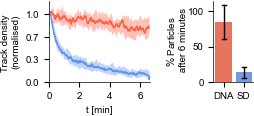

In [16]:
# Plot
f, axs = plt.subplots(1, 2, figsize=(1, 1), gridspec_kw={'width_ratios': [3, 1.2]})
f.set_figheight(0.9)
f.set_figwidth(2.2)
f.subplots_adjust(left=0.02, right=0.95, bottom=0.05,
                  top=0.95, wspace=0.9, hspace=0.05)

# Params
qA = 0.25
qB = 0.75
qC = 0.5
alpha = 0.4
dt = 0.08


# Lineplot
all_nTracks_PAINT = all_nTracks_rolling_normalized.iloc[:,
                                                        index_PAINT[0]:index_PAINT[-1]+1]
axs[0].plot(all_nTracks_PAINT.index * dt,
            all_nTracks_PAINT.quantile(q=qC, axis=1), color='tomato', alpha=1)
axs[0].fill_between(all_nTracks_PAINT.index * dt,
                    all_nTracks_PAINT.quantile(q=qA, axis=1),
                    all_nTracks_PAINT.quantile(q=qB, axis=1),
                    color='tomato', alpha=alpha, lw=0)


all_nTracks_SD_DNA = all_nTracks_rolling_normalized.iloc[:,
                                                         index_SD_DNA[0]:index_SD_DNA[-1]+1]
axs[0].plot(all_nTracks_SD_DNA.index * dt, all_nTracks_SD_DNA.quantile(q=qC,
            axis=1), color='cornflowerblue', alpha=1)
axs[0].fill_between(all_nTracks_SD_DNA.index * dt,
                    all_nTracks_SD_DNA.quantile(q=qA, axis=1),
                    all_nTracks_SD_DNA.quantile(q=qB, axis=1),
                    color='cornflowerblue', alpha=alpha, lw=0)


axs[0].set_ylabel('Track density \n(normalised)')
axs[0].set_xlim(0, 400)
axs[0].set_ylim(0, 1.2)
axs[0].set_xticks(np.arange(0, 400, step=120))
axs[0].set_yticks(np.arange(0, 1.01, step=0.33333))
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y/60:.0f}'))
axs[0].set_xlabel('t [min]')


# Barplot at 6min (4500 frames * 0.08s)
data_DNA = pd.DataFrame({'type': 'DNA', 'value': all_nTracks_PAINT.iloc[4500]})
data_DNA = data_DNA.loc[~data_DNA.value.isnull()]

data_SD = pd.DataFrame({'type': 'SD', 'value': all_nTracks_SD_DNA.iloc[4500]})
data_SD = data_SD.loc[~data_SD.value.isnull()]

df = pd.concat([data_DNA, data_SD], axis=0, ignore_index=True)
df.value = df.value*100  # for percentage

ax = sns.barplot(data=df, x='type', palette=['tomato', 'cornflowerblue'],
                 y='value', linewidth=1, capsize=.2, errcolor='black', errwidth=1, ci='sd')

ax.set_ylabel(r'$\%$ Particles''\n'' after 6 minutes', labelpad=0)
ax.set_xlabel('')
ax.set_ylim(bottom=0);

In [17]:
def find_T_crit(NgT, Ts):
    Tcrit = Ts[np.argmax(NgT < 0.5)]
    return Tcrit

dictNgT = dict(zip(df_data.NgT.index, df_data.NgT.values))
allNgT = pd.DataFrame({key: pd.Series(value) for key, value in dictNgT.items()})

# Define Ts
Ts = np.concatenate((np.arange(1, 49.91, 0.1),
                    np.arange(50, 99.1, 1),
                    np.arange(100, 398.1, 2),
                    np.arange(400, 1998.1, 5),
                    np.arange(2000, 4981, 20),
                    np.arange(5000, 50001, 1000)), axis=0)

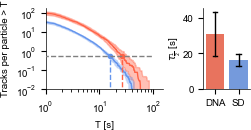

In [18]:
# %% TPP Plot
f, axs = plt.subplots(1, 2, figsize=(1, 1), gridspec_kw={'width_ratios': [3, 1.2]})
f.set_figheight(0.9)
f.set_figwidth(2.2)
f.subplots_adjust(left=0.02, right=0.95, bottom=0.05,
                  top=0.95, wspace=0.5, hspace=0.05)

# Params
qA = 0.25
qB = 0.75
qC = 0.5
alpha = 0.4
dt = 0.08

# get indices of the different conditions
index_PAINT = df_data.loc[df_data.condition == 'DNA-PAINT'].index.tolist()
index_SD = df_data.loc[df_data.condition == 'SD'].index.tolist()

axs[0].set_yscale('log')
axs[0].set_xscale('log')

allTracks_PAINT = allNgT.iloc[:, index_PAINT[0]:index_PAINT[-1]]
allTracks_SD = allNgT.iloc[:, index_SD[0]:index_SD[-1]]

Tcrit_PAINT = find_T_crit(allTracks_PAINT.quantile(q=0.5, axis=1), Ts)
Tcrit_SD = find_T_crit(allTracks_SD.quantile(q=0.5, axis=1), Ts)


# Lineplot with uncertainty
axs[0].plot(Ts, allTracks_PAINT.quantile(q=0.5, axis=1), color='tomato', alpha=1)
axs[0].fill_between(Ts, allTracks_PAINT.quantile(q=0.25, axis=1), allTracks_PAINT.quantile(q=0.75, axis=1),
                    color='tomato', alpha=0.4)

axs[0].plot(Ts, allTracks_SD.quantile(q=0.5, axis=1),
            color='cornflowerblue', alpha=1)
axs[0].fill_between(Ts, allTracks_SD.quantile(q=0.25, axis=1), allTracks_SD.quantile(q=0.75, axis=1),
                    color='cornflowerblue', alpha=0.4, lw=0)

# T_crit marker
axs[0].plot(Tcrit_PAINT, 0.5, 'o', color='tomato', markersize=3, zorder=100, lw=0)
axs[0].plot(Tcrit_SD, 0.5, 'o', color='cornflowerblue', markersize=3, zorder=100)

# T_crit lines
axs[0].hlines(0.5, 0, 100, color='gray', ls='--', zorder=100, linewidth=1)
axs[0].vlines(Tcrit_PAINT, 0, 0.5, color='tomato', ls='--', zorder=100, linewidth=1)
axs[0].vlines(Tcrit_SD, 0, 0.5, color='cornflowerblue',
              ls='--', zorder=100, linewidth=1)


axs[0].set_ylabel('Tracks per particle > T')
axs[0].set_ylim(1/allTracks_SD.mean(axis=1).max(),
                2*allTracks_PAINT.mean(axis=1).max())
axs[0].set_xlim(1, 150)
axs[0].set_xlabel('T [s]')
axs[0].set_yticks([0.01, 0.1, 1, 10, 100])


# Bar plot
data_DNA = pd.DataFrame(
    {'type': 'DNA', 'tau': df_data.loc[df_data.condition == 'DNA-PAINT'].Tcrit})
data_DNA = data_DNA.loc[~data_DNA.tau.isnull()]

data_SD = pd.DataFrame(
    {'type': 'SD', 'tau': df_data.loc[df_data.condition == 'SD'].Tcrit})
data_SD = data_SD.loc[~data_SD.tau.isnull()]

df = pd.concat([data_DNA, data_SD], axis=0, ignore_index=True)

ax = sns.barplot(data=df, x='type', palette=['tomato', 'cornflowerblue'],
                 y='tau', linewidth=1, capsize=.2, errcolor='black', errwidth=1, ci='sd')
ax.set_ylabel(r'$\tau_{\frac{1}{2}}$ [s]', labelpad=0)
ax.set_xlabel('')
ax.set_ylim(bottom=0);